# SYS 611: M&M Counting Model

Paul T. Grogan <pgrogan@stevens.edu>

This example estimates the number of M&M candies in a jar using Monte Carlo simulation.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy`, `scipy.stats`, and `matplotlib.pyplot` libraries.

In [1]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it as `np`
import numpy as np

# import the matplotlib pyplot package and refer to it as `plt`
import matplotlib.pyplot as plt

# import the scipy stats package and refer to it as `stats`
import scipy.stats as stats

## Estimator

Use process generators for unknown quantities (jar effective volume, packing factor, candy diameter, and candy thickness) and create a point estimate.

In [2]:
def generate_count(size=1):
    # sample the jar volume
    V = np.random.triangular(1890*.98, 1890, 1890*1.02, size)
    # sample the packing factor
    mu = np.random.triangular(0.55*0.8, 0.55, 0.55*1.2, size)
    # sample the average M&M diameter
    d = np.random.triangular(1.4*0.9, 1.4, 1.4*1.1, size)
    # sample the average M&M thickness
    t = np.random.triangular(0.6*0.9, 0.6, 0.6*1.1, size)
    # sample and return the derived number of M&Ms in the jar
    N = 6*V*mu/(np.pi*d**2*t)
    return N.astype(int)

## Estimating the M&M Count
Construct a Monte Carlo simulator to generate a large number of estimates.

N_bar = 1698


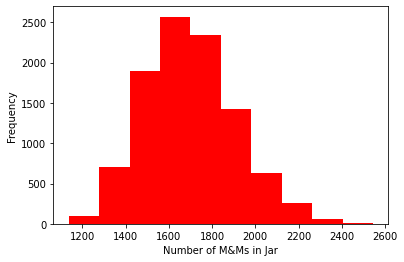

In [3]:
NUM_RUNS = 10000

# generate NUM_RUNS samples
N = generate_count(NUM_RUNS)

# create a histogram to visualize results
plt.figure()
plt.hist(N, color='r')
plt.xlabel('Number of M&Ms in Jar')
plt.ylabel('Frequency')

# print descriptive statistics
print('N_bar = {:.0f}'.format(np.mean(N)))

## Visualizing the Probability of Winning

Construct a Monte Carlo simulator using a distribution of opponent's guesses.

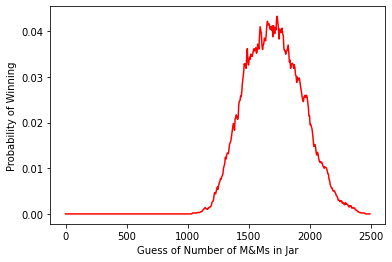

In [7]:
NUM_OPPONENTS = 50

# define the space of possible guesses
x = np.arange(0,2500,5)

# define the outcomes (number of wins)
w = np.zeros(np.size(x))

# iterate over each run
for run in range(NUM_RUNS):
    # set the random number generator seed
    np.random.seed(run)
    # generate a true number of M&Ms
    N_star = generate_count()
    # sample the opponents' guesses from a triangular distribution
    y = np.random.triangular(500, 1600, 2500, NUM_OPPONENTS)
    
    if np.sum(y[y<=N_star]) > 0:
        # if at least one opponent has a winning choice
        # a winning alternative must be <= the true number of M&Ms
        # and >= the best opponent's guess
        winners = np.logical_and(x<=N_star, x>=np.max(y[y<=N_star]))
    else:
        # otherwise a winning alternative must be <= the true number of M&Ms
        winners = x<=N_star
    
    # if any alternative is a winner, record the outcomes
    if np.any(winners):
        w[winners] += 1

# plot a distribution of the probability of an alternative winning
plt.figure()
plt.plot(x, w/NUM_RUNS, '-r')
plt.xlabel('Guess of Number of M&Ms in Jar')
plt.ylabel('Probability of Winning')
plt.show()